In [58]:
# Modules that we need
from Vissim_env_class import environment, Load_Vissim
from MasterAC_Agent import MasterAC_Agent
from MasterDQN_Agent import MasterDQN_Agent
import numpy as np

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# MOVA

In [12]:
Vissim \
= \
Load_Vissim(
Path_to_network = 'C:\\Users\\nwalton\\OneDrive - The Alan Turing Institute\\Documents\\MLforFlowOptimisation\\NSW_9_Cross_Experiment\\Single_Cross_TripleMOVA\\',\
inpx_Filename = 'Single_Cross_TripleMOVA.inpx',\
layx_Filename = 'Single_Cross_TripleMOVA.layx',\
attempts=5)

fail
fail
fail
fail
success


# MOVA 

In [15]:
# Delete all previous simulation runs first:

data = []    

End_of_simulation = 3600
no_of_simulations = 1
#demands = [800]
demands = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]

Vissim.Graphics.CurrentNetworkWindow.SetAttValue("QuickMode",1)
Vissim.SuspendUpdateGUI()
Vissim.Simulation.SetAttValue('SimPeriod', End_of_simulation)
Vissim.Simulation.SetAttValue('UseMaxSimSpeed', True)

for demand in demands :
    for simRun in Vissim.Net.SimulationRuns:
        Vissim.Net.SimulationRuns.RemoveSimulationRun(simRun)

    # change demand
    for V_input in Vissim.Net.VehicleInputs:
        V_input.SetAttValue('Volume(1)', demand)

    for cnt_Sim in range(no_of_simulations):
        Vissim.Simulation.SetAttValue('RandSeed', cnt_Sim + 1) # Note: RandSeed 0 is not allowed
        Vissim.Simulation.RunContinuous()

    data.append([demand, Vissim.Net.DelayMeasurements.GetMultiAttValues('VehDelay(Avg,Avg,All)')])
    print(data[-1]) 

[100, ((1, 7.446552993524715), (2, 7.153506964173266), (3, 7.535995284345372), (4, 0.0043525969851974655), (5, 47.697300249276594), (6, 8.714687353181663), (7, 77.13508997891475), (8, 50.98916038123184), (9, 6.79320755010974), (10, 7.079933840348042), (11, 7.1467488480627), (12, 5.928709828290841))]
[200, ((1, 14.850448095486518), (2, 13.108513848240062), (3, 8.205317434624488), (4, 0.845212033128302), (5, 28.881705343509974), (6, 14.022860511151087), (7, 34.32637845196446), (8, 25.22929097854644), (9, 10.769391631660664), (10, 9.618690155087677), (11, 8.715699752355563), (12, 10.054242322889163))]
[300, ((1, 20.24679533408163), (2, 16.14349184633222), (3, 12.508920432466066), (4, 2.402636181420907), (5, 19.899409367256258), (6, 14.67294079742206), (7, 36.7913576888143), (8, 22.849602804813333), (9, 12.754896264477157), (10, 15.436585462601073), (11, 13.153735385323921), (12, 9.789091964162985))]
[400, ((1, 22.109024403254), (2, 18.989229778807037), (3, 19.376127664556243), (4, 3.13175

In [18]:
data

[[100,
  ((1, 7.446552993524715),
   (2, 7.153506964173266),
   (3, 7.535995284345372),
   (4, 0.0043525969851974655),
   (5, 47.697300249276594),
   (6, 8.714687353181663),
   (7, 77.13508997891475),
   (8, 50.98916038123184),
   (9, 6.79320755010974),
   (10, 7.079933840348042),
   (11, 7.1467488480627),
   (12, 5.928709828290841))],
 [200,
  ((1, 14.850448095486518),
   (2, 13.108513848240062),
   (3, 8.205317434624488),
   (4, 0.845212033128302),
   (5, 28.881705343509974),
   (6, 14.022860511151087),
   (7, 34.32637845196446),
   (8, 25.22929097854644),
   (9, 10.769391631660664),
   (10, 9.618690155087677),
   (11, 8.715699752355563),
   (12, 10.054242322889163))],
 [300,
  ((1, 20.24679533408163),
   (2, 16.14349184633222),
   (3, 12.508920432466066),
   (4, 2.402636181420907),
   (5, 19.899409367256258),
   (6, 14.67294079742206),
   (7, 36.7913576888143),
   (8, 22.849602804813333),
   (9, 12.754896264477157),
   (10, 15.436585462601073),
   (11, 13.153735385323921),
   (12, 9

In [28]:
f= open("MOVA_Demands.txt","w+")

f.write('demand, junction_1, junction_2, junction_3, junction_4')

for i in range(len(data)):
    f.write('\n')
    for j in range(len(data[i])):
        if j == 0 :
            f.write(str(data[i][j])+', ')
        if j == 1:
            for k in range(len(data[i][j])):
                f.write(str(data[i][j][k][1])+', ')
    
f.close()

In [23]:
len(data[0])

2

# AC Agent

In [32]:
Vissim \
= \
Load_Vissim(
Path_to_network = 'C:\\Users\\nwalton\\OneDrive - The Alan Turing Institute\\Documents\\MLforFlowOptimisation\\NSW_9_Cross_Experiment\\Single_Cross_TripleMOVA\\',\
inpx_Filename = 'Single_Cross_Triple.inpx',\
layx_Filename = 'Single_Cross_Triple.layx',\
attempts=5,
Vissim=Vissim)

success


In [33]:
gamma = 0.95
alpha = 0.000001


value = 5
entropy = 500
n_step_size = 4
state_size = [13]
reduce_entropy_every = 100
Random_Seed = 100



# for the monitoring
horizon = 50
n_sample = 10

In [34]:
model_name  = 'Single_Cross_Triple'
vissim_working_directory =  'C:\\Users\\Rzhang\\Desktop\\MLforFlowOptimisationOrigine\\Vissim\\'
sim_length = 3601

agent_type = "AC"
Session_ID = "Single_Cross_Triple8_actions_AC10"

# all controller actions
Single_Cross_Triple_dictionary8 =\
{\
    # Controller Number 0 
   'junctions' : {0 : {'default_actions' :  {    0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                             1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                             2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                             3 : [0,0,0,0,0,0,0,0,0,1,1,1],
                                             4 : [1,0,0,0,0,0,1,0,0,0,0,0],
                                             5 : [0,0,0,1,0,0,0,0,0,1,0,0],
                                             6 : [0,1,1,0,0,0,0,1,1,0,0,0],
                                             7 : [0,0,0,0,1,1,0,0,0,0,1,1]},
         
         'all_actions' :        {            0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                             1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                             2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                             3 : [0,0,0,0,0,0,0,0,0,1,1,1],
                                             4 : [1,0,0,0,0,0,1,0,0,0,0,0],
                                             5 : [0,0,0,1,0,0,0,0,0,1,0,0],
                                             6 : [0,1,1,0,0,0,0,1,1,0,0,0],
                                             7 : [0,0,0,0,1,1,0,0,0,0,1,1]},
 
         'link' : [1, 3, 5, 7],
         'lane' : ['1-1', '1-2', '1-3', '3-1', '3-2', '3-3', '5-1', '5-2', '5-3', '7-1', '7-2', '7-3'],
         
         'controled_by_com' : True,
         'agent_type' : agent_type,
         'green_time' : 6,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [13],
         'state_type' : 'QueuesSig',
         'reward_type' : 'Queues' ,
         'queues_counter_ID' : [1,2,3,4,5,6,7,8,9,10,11,12]             
         }
    },
   'demand' : { 'default' : [400, 400, 400, 400],
             
             0 : [300,300,300,300],
             1 : [600,600,600,600],
             2 : [1350,750,1350,750],
             3 : [1500,750,1500,750],
             4 : [1050,750,1050,750],
             5 : [750,1050,750,1050],
             6 : [750,1500,750,1500],
             7 : [750,1350,750,1350],
             8 : [600,600,600,600],
             9 : [300,300,300,300]
            }
}

In [35]:
Single_Cross_Triple8_MultiAC_Agents = MasterAC_Agent(model_name, vissim_working_directory, sim_length, Single_Cross_Triple_dictionary8,\
                n_step_size, gamma, alpha, entropy, value, \
                Random_Seed = Random_Seed, timesteps_per_second = 1, Session_ID = Session_ID, verbose = True, \
                 horizon = horizon, n_sample = n_sample)

Deploying instance of Actor_Critic Agent(s) !!! TENSORFLOW 2 IS NEEDED !!! 
Model: "model2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
value1 (Dense)               multiple                  672       
_________________________________________________________________
value2 (Dense)               multiple                  1176      
_________________________________________________________________
value (Dense)                multiple                  25        
_________________________________________________________________
policy_logits1 (Dense)       multiple                  672       
_________________________________________________________________
policy_logits2 (Dense)       multiple                  1176      
_________________________________________________________________
policy_logits (Dense)        multiple                  200       
__________________________________________________

In [47]:
Single_Cross_Triple8_MultiAC_Agents.load(episode=400,
                                          best=False, 
                                        load_location='C:\\Users\\nwalton\\OneDrive - The Alan Turing Institute\\Documents\\MLforFlowOptimisation\\NSW_9_Cross_Experiment\\Single_Cross_TripleMOVA\\Agents_Results\\Raymond_400\\'
                                         )

here - delete
Loading Pre-Trained Agent 0, Architecture, Optimizer and Memory.
Model: "model2_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
value1 (Dense)               multiple                  672       
_________________________________________________________________
value2 (Dense)               multiple                  1176      
_________________________________________________________________
value (Dense)                multiple                  25        
_________________________________________________________________
policy_logits1 (Dense)       multiple                  672       
_________________________________________________________________
policy_logits2 (Dense)       multiple                  1176      
_________________________________________________________________
policy_logits (Dense)        multiple                  200       
____________________________________________

ValueError: You are trying to load a weight file containing 8 layers into a model with 6 layers.

In [43]:
data = []    

End_of_simulation = 3600
no_of_simulations = 1
demands = [100, 200, 300, 400, 500,  600, 700, 800, 900, 1000, 1100, 1200]

Vissim.Graphics.CurrentNetworkWindow.SetAttValue("QuickMode",1)
Vissim.SuspendUpdateGUI()
Vissim.Simulation.SetAttValue('SimPeriod', End_of_simulation)
Vissim.Simulation.SetAttValue('UseMaxSimSpeed', True)

for demand in demands :
    for simRun in Vissim.Net.SimulationRuns:
        Vissim.Net.SimulationRuns.RemoveSimulationRun(simRun)
    
    for i in range(10):
        Single_Cross_Triple_dictionary8['demand'][i] = [demand,demand,demand,demand]
    
    Single_Cross_Triple8_MultiAC_Agents\
    = MasterAC_Agent(model_name, 
                     vissim_working_directory, 
                     sim_length, 
                     Single_Cross_Triple_dictionary8,
                     n_step_size, 
                     gamma, 
                     alpha, 
                     entropy, 
                     value,
                     Random_Seed = Random_Seed, 
                     timesteps_per_second = 1, 
                     Session_ID = Session_ID, 
                     verbose = True, 
                     horizon = horizon, 
                     n_sample = n_sample)

    Single_Cross_Triple8_MultiAC_Agents.load(episode=100,
                                          best=False, 
                                        load_location='C:\\Users\\nwalton\\OneDrive - The Alan Turing Institute\\Documents\\MLforFlowOptimisation\\NSW_9_Cross_Experiment\\Single_Cross_TripleMOVA\\Agents_Results\\Raymond_400\\'
                                         )
    
    (Episode_Queues, 
     Cumulative_Episode_Delays,
     Cumulative_Episode_stop_Delays, 
     Cumulative_Totale_network_delay,
     Cumulative_Totale_network_stop_delay) = Single_Cross_Triple8_MultiAC_Agents.test(vissim=Vissim)
    
    data.append([demand, Vissim.Net.DelayMeasurements.GetMultiAttValues('VehDelay(Avg,Avg,All)')])
    print(data[-1]) 

Deploying instance of Actor_Critic Agent(s) !!! TENSORFLOW 2 IS NEEDED !!! 
Model: "model2_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
value1 (Dense)               multiple                  672       
_________________________________________________________________
value2 (Dense)               multiple                  1176      
_________________________________________________________________
value (Dense)                multiple                  25        
_________________________________________________________________
policy_logits1 (Dense)       multiple                  672       
_________________________________________________________________
policy_logits2 (Dense)       multiple                  1176      
_________________________________________________________________
policy_logits (Dense)        multiple                  200       
________________________________________________

loaded from  C:\Users\nwalton\OneDrive - The Alan Turing Institute\Documents\MLforFlowOptimisation\NSW_9_Cross_Experiment\Single_Cross_TripleMOVA\Agents_Results\Raymond_400\Episode100Agent0_Weights.h5
Items successfully loaded.
Random seed set in simulator. Random Seed = 100
Deploying Network Parser...
Successful Network Crawl: Identified SignalControllers, Links, Lanes and Vehicle Inputs.

Setting Simulation mode to: test
Starting Deployments of Signal Control Units...
SCUs successfully deployed. Elapsed time 0.08 seconds.

[300, ((1, None), (2, None), (3, None), (4, 33.99484194523568), (5, 57.74873105506622), (6, 21.608453014324297), (7, 84.55158161606523), (8, 80.29739937598586), (9, 73.26185463756777), (10, 35.474085112539875), (11, 37.70334419401834), (12, 0.0))]
Deploying instance of Actor_Critic Agent(s) !!! TENSORFLOW 2 IS NEEDED !!! 
Model: "model2_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param 

loaded from  C:\Users\nwalton\OneDrive - The Alan Turing Institute\Documents\MLforFlowOptimisation\NSW_9_Cross_Experiment\Single_Cross_TripleMOVA\Agents_Results\Raymond_400\Episode100Agent0_Weights.h5
Items successfully loaded.
Random seed set in simulator. Random Seed = 100
Deploying Network Parser...
Successful Network Crawl: Identified SignalControllers, Links, Lanes and Vehicle Inputs.

Setting Simulation mode to: test
Starting Deployments of Signal Control Units...
SCUs successfully deployed. Elapsed time 0.06 seconds.

[600, ((1, None), (2, None), (3, None), (4, 31.69877229756161), (5, 26.750342472870088), (6, 185.8664434310498), (7, 1567.4560060801145), (8, 1102.3641567182938), (9, 1380.6257519208575), (10, 53.243496919993234), (11, 44.88059848073036), (12, 47.60087835568196))]
Deploying instance of Actor_Critic Agent(s) !!! TENSORFLOW 2 IS NEEDED !!! 
Model: "model2_7"
_________________________________________________________________
Layer (type)                 Output Shape   

loaded from  C:\Users\nwalton\OneDrive - The Alan Turing Institute\Documents\MLforFlowOptimisation\NSW_9_Cross_Experiment\Single_Cross_TripleMOVA\Agents_Results\Raymond_400\Episode100Agent0_Weights.h5
Items successfully loaded.
Random seed set in simulator. Random Seed = 100
Deploying Network Parser...
Successful Network Crawl: Identified SignalControllers, Links, Lanes and Vehicle Inputs.

Setting Simulation mode to: test
Starting Deployments of Signal Control Units...
SCUs successfully deployed. Elapsed time 0.07 seconds.

[900, ((1, None), (2, None), (3, None), (4, 42.98229684115938), (5, 54.06743668172332), (6, 36.02144371541922), (7, 50.52617982314632), (8, 69.60773606776556), (9, 58.41451646615158), (10, 0.0), (11, 1.115406308094753), (12, None))]
Deploying instance of Actor_Critic Agent(s) !!! TENSORFLOW 2 IS NEEDED !!! 
Model: "model2_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
value1 (D

loaded from  C:\Users\nwalton\OneDrive - The Alan Turing Institute\Documents\MLforFlowOptimisation\NSW_9_Cross_Experiment\Single_Cross_TripleMOVA\Agents_Results\Raymond_400\Episode100Agent0_Weights.h5
Items successfully loaded.
Random seed set in simulator. Random Seed = 100
Deploying Network Parser...
Successful Network Crawl: Identified SignalControllers, Links, Lanes and Vehicle Inputs.

Setting Simulation mode to: test
Starting Deployments of Signal Control Units...
SCUs successfully deployed. Elapsed time 0.06 seconds.

[1200, ((1, None), (2, None), (3, None), (4, 43.41995669934332), (5, 55.73123560842717), (6, 209.92030515474556), (7, 99.22609267216431), (8, 116.77563888866159), (9, 108.03503250534176), (10, 346.3748098327337), (11, 323.49519210742693), (12, 531.2570339786845))]


In [44]:
data

[[100,
  ((1, 84.55955462989385),
   (2, 14.06030202393351),
   (3, None),
   (4, 47.24428101833146),
   (5, 117.38007511739507),
   (6, 50.40447695743164),
   (7, 40.74676531764831),
   (8, 36.304726344525136),
   (9, 20.834759211714395),
   (10, 106.72018009696073),
   (11, 80.37594705307481),
   (12, 146.30663742819561))],
 [200,
  ((1, None),
   (2, None),
   (3, None),
   (4, 30.829203781336297),
   (5, 40.83749206723818),
   (6, 22.216839350063175),
   (7, 173.19578587173137),
   (8, 141.52312298374852),
   (9, 128.21263197730104),
   (10, 183.4540682813063),
   (11, 112.84598583148166),
   (12, 165.172403741846))],
 [300,
  ((1, None),
   (2, None),
   (3, None),
   (4, 33.99484194523568),
   (5, 57.74873105506622),
   (6, 21.608453014324297),
   (7, 84.55158161606523),
   (8, 80.29739937598586),
   (9, 73.26185463756777),
   (10, 35.474085112539875),
   (11, 37.70334419401834),
   (12, 0.0))],
 [400,
  ((1, 10.759037644165629),
   (2, 6.134351268418787),
   (3, 7.19263889689427

In [45]:
Single_Cross_Triple8_MultiAC_Agents.demo(vissim=Vissim)

Random seed set in simulator. Random Seed = 100
Deploying Network Parser...
Successful Network Crawl: Identified SignalControllers, Links, Lanes and Vehicle Inputs.

Setting Simulation mode to: demo
Starting Deployments of Signal Control Units...
SCUs successfully deployed. Elapsed time 0.34 seconds.



# DQN Agent

In [64]:
model_name  = 'Single_Cross_Triple'
vissim_working_directory =  'C:\\Users\\nwalton\\OneDrive - The Alan Turing Institute\\Documents\\MLforFlowOptimisation\\Vissim\\'
sim_length = 3601

agent_type = "DuelingDDQN"
Session_ID = "Single_Cross_Triple8_actions_DuelingDDQN20c10"

# all controller actions
Single_Cross_Triple_dictionary8 =\
{\
    # Controller Number 0 
   'junctions' : {0 : {'default_actions' :  {    0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                             1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                             2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                             3 : [0,0,0,0,0,0,0,0,0,1,1,1],
                                             4 : [1,0,0,0,0,0,1,0,0,0,0,0],
                                             5 : [0,0,0,1,0,0,0,0,0,1,0,0],
                                             6 : [0,1,1,0,0,0,0,1,1,0,0,0],
                                             7 : [0,0,0,0,1,1,0,0,0,0,1,1]},
         
         'all_actions' :        {            0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                             1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                             2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                             3 : [0,0,0,0,0,0,0,0,0,1,1,1],
                                             4 : [1,0,0,0,0,0,1,0,0,0,0,0],
                                             5 : [0,0,0,1,0,0,0,0,0,1,0,0],
                                             6 : [0,1,1,0,0,0,0,1,1,0,0,0],
                                             7 : [0,0,0,0,1,1,0,0,0,0,1,1]},
 
         'link' : [1, 3, 5, 7],
         'lane' : ['1-1', '1-2', '1-3', '3-1', '3-2', '3-3', '5-1', '5-2', '5-3', '7-1', '7-2', '7-3'],
         
         'controled_by_com' : True,
         'agent_type' : agent_type,
         'green_time' : 6,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [13],
         'state_type' : 'QueuesSig',
         'reward_type' : 'Queues' ,
         'queues_counter_ID' : [1,2,3,4,5,6,7,8,9,10,11,12]             
         }
    },
   'demand' : { 'default' : [400, 400, 400, 400],
             
             0 : [300,300,300,300],
             1 : [600,600,600,600],
             2 : [1350,750,1350,750],
             3 : [1500,750,1500,750],
             4 : [1050,750,1050,750],
             5 : [750,1050,750,1050],
             6 : [750,1500,750,1500],
             7 : [750,1350,750,1350],
             8 : [600,600,600,600],
             9 : [300,300,300,300]
            }
}

In [65]:
## DQN Hyperaramenters
episodes = 400 
copy_weights_frequency = 20 # On a successfull run I copied the weight every 50

PER_activated = True
memory_size = 1000
batch_size = 128

gamma = 0.95
alpha = 0.005

In [66]:

import numpy as np 
import pylab as plt
import os
import csv
import pandas as pd

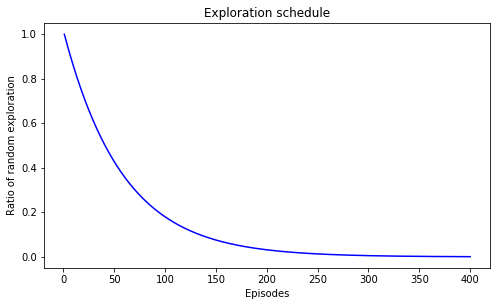

In [67]:
# Exploration Schedule ("linear" or "geometric")
exploration_schedule = "geometric"
epsilon_start = 1
epsilon_end   = 0.001

Random_Seed = 100

def choose_schedule(exploration_schedule, espilon_start, epsilon_end, episodes):
    if exploration_schedule == "linear":
        epsilon_decay = 1.2*(epsilon_end - epsilon_start)/(episodes-1)
        epsilon_sequence = [1 + epsilon_decay * entry for entry in range(episodes+1)]
        epsilon_sequence = [0 if entry < 0 else entry for entry in epsilon_sequence]
    elif exploration_schedule == "geometric":
        epsilon_decay = np.power(epsilon_end/epsilon_start, 1./(episodes-1)) # Geometric decay
        epsilon_sequence = [epsilon_start * epsilon_decay ** entry for entry in range(episodes+1)]
    elif exploration_schedule == "entropy":
        pass
    else:
        print("ERROR: Unrecognized choice of exploration schedule.")
        
    # Plotting exploration schedule
    plt.figure(figsize=(8,4.5))
    x_series = np.array(range(1,episodes+1))
    y_series = epsilon_sequence[0:episodes]
    plt.plot(x_series, y_series, '-b')
    plt.xlabel('Episodes')
    plt.ylabel('Ratio of random exploration')
    plt.title('Exploration schedule')
    plt.show()
    return(epsilon_sequence)

epsilon_sequence = choose_schedule(exploration_schedule, epsilon_start, epsilon_end, episodes)

In [68]:
Single_Cross_Triple8_MultiDQN_Agents =\
MasterDQN_Agent(model_name,
                vissim_working_directory,
                sim_length,
                Single_Cross_Triple_dictionary8,
                'default_actions',
                gamma, 
                alpha, 
                agent_type, 
                memory_size, 
                PER_activated, 
                batch_size, 
                copy_weights_frequency, 
                epsilon_sequence,
                Random_Seed = Random_Seed, 
                timesteps_per_second = 1, 
                Session_ID = Session_ID, 
                verbose = True)

INTERSECTION 0: SETTING UP AGENT
Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 13)]         0                                            
__________________________________________________________________________________________________
dense_12 (Dense)                (None, 24)           336         input_3[0][0]                    
__________________________________________________________________________________________________
dense_13 (Dense)                (None, 24)           600         dense_12[0][0]                   
__________________________________________________________________________________________________
dense_16 (Dense)                (None, 24)           600         dense_13[0][0]                   
___________________________________________________________

In [73]:
Single_Cross_Triple8_MultiDQN_Agents.load(300,best = False)

Loading Pre-Trained Agent 0, Architecture, Optimizer and Memory.


OSError: SavedModel file does not exist at: C:\Users\nwalton\OneDrive - The Alan Turing Institute\Documents\MLforFlowOptimisation\Vissim\Single_Cross_Triple\Agents_Results\DuelingDDQN\Single_Cross_Triple8_actions_DuelingDDQN20c10\Episode300Agent0.h5/{saved_model.pbtxt|saved_model.pb}

In [ ]:
data = []    

End_of_simulation = 3600
sim_length = 3600
no_of_simulations = 1
demands = [200, 400, 600, 800, 1000, 1200]

Vissim.Graphics.CurrentNetworkWindow.SetAttValue("QuickMode",1)
Vissim.SuspendUpdateGUI()
Vissim.Simulation.SetAttValue('SimPeriod', End_of_simulation)
Vissim.Simulation.SetAttValue('UseMaxSimSpeed', True)

for demand in demands :
    for simRun in Vissim.Net.SimulationRuns:
        Vissim.Net.SimulationRuns.RemoveSimulationRun(simRun)
    
    for i in range(10):
        Single_Cross_Straight_dictionary['demand'][i] = [demand,demand,demand,demand]
    
    Single_Cross_Straight_MultiDQN_Agents =\
    MasterDQN_Agent(model_name, 
                    vissim_working_directory, 
                    sim_length, 
                    Single_Cross_Straight_dictionary,
                    'default_actions',
                    gamma, alpha, agent_type, memory_size, PER_activated, 
                    batch_size, copy_weights_frequency, epsilon_sequence,
                    Random_Seed = Random_Seed, timesteps_per_second = 1, 
                    Session_ID = Session_ID, verbose = True)


    Single_Cross_Straight_MultiDQN_Agents.load(300,False) 
    
    for V_input in Vissim.Net.VehicleInputs:
        V_input.SetAttValue('Volume(1)', demand)
    
    Single_Cross_Straight_MultiDQN_Agents.test(vissim=Vissim)
    
    data.append([demand, Vissim.Net.DelayMeasurements.GetMultiAttValues('VehDelay(Avg,Avg,All)')])
    print(data[-1]) 